https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health

plt.yticks([0, 2, 4, 6, 8, 10],['0', '2B', '4B', '6B', '8B', '10B'] # primer argumento es la escala (en este caso de dos en dos), el segundo es el nombre que se muestra en la grafica

Aquí tienes la traducción de las descripciones de las columnas:

| Nombre de la columna | Descripción                                                                                          |
|---------------------|------------------------------------------------------------------------------------------------------|
| age                 | Edad del participante. (Entero)                                                                   |
| year                | Año de estudio del participante. (Entero)                                                         |
| sex                 | Género del participante. (Cadena de texto)                                                                 |
| glang               | Idioma hablado por el participante. (Cadena de texto)                                                        |
| job                 | Trabajo del participante. (Cadena de texto)                                                                    |
| stud_h              | Horas de estudio por semana del participante. (Entero)                                               |
| health              | Estado de salud autoreportado del participante. (Cadena de texto)                                            |
| psyt                | Puntuación de angustia psicológica del participante. (Entero)                                          |
| jspe                | Puntuación de satisfacción laboral del participante. (Entero)                                                |
| qcae_cog            | Puntuación de empatía cognitiva del participante. (Entero)                                               |
| qcae_aff            | Puntuación de empatía afectiva del participante. (Entero)                                               |
| amsp                | Puntuación de motivación académica del participante. (Entero)                                             |
| erec_mean           | Puntuación media de empatía del participante. (Entero)                                             |
| cesd                | Escala de Depresión del Centro de Estudios Epidemiológicos del participante. (Entero)                    |
| stai_t              | Escala de Inventario de Ansiedad Estado-Rasgo del participante. (Entero)                                   |
| mbi_ex              | Escala de Agotamiento del Inventario de Burnout de Maslach del participante. (Entero)                            |
| mbi_cy              | Escala de Cínismo del Inventario de Burnout de Maslach del participante. (Entero)                            |
| mbi_ea              | Escala de Eficacia Profesional del Inventario de Burnout de Maslach del participante. (Entero)               |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
medTeach = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv')
medTeach.drop('id', axis=1, inplace=True)
medTeach.head()

age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   18     1    1    120     1    0      56       3     0    88        62   
1   26     4    1      1     1    0      20       4     0   109        55   
2   21     3    2      1     0    0      36       3     0   106        64   
3   21     2    2      1     0    1      51       5     0   101        52   
4   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23

In [4]:
print(medTeach.columns)
print("year",medTeach["year"].unique())
print("sex",medTeach["sex"].unique())
print("glang",medTeach["glang"].unique())
print("part",medTeach["part"].unique())
print("job",medTeach["job"].unique())
print("health",medTeach["health"].unique())
print("psyt",medTeach["psyt"].unique())

medTeach['part'] = medTeach['part'].astype(bool)
medTeach['job'] = medTeach['job'].astype(bool)
medTeach['psyt'] = medTeach['psyt'].astype(bool)


medTeach['year'] = medTeach['year'].astype(str)
medTeach['sex'] = medTeach['sex'].astype(str)
medTeach['glang'] = medTeach['glang'].astype(str)
medTeach['health'] = medTeach['health'].astype(str)

print("year",medTeach["year"].unique())
print("sex",medTeach["sex"].unique())
print("glang",medTeach["glang"].unique())
print("part",medTeach["part"].unique())
print("job",medTeach["job"].unique())
print("health",medTeach["health"].unique())
print("psyt",medTeach["psyt"].unique())


Index(['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health',
       'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd',
       'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea'],
      dtype='object')
year [1 4 3 2 5 6]
sex [1 2 3]
glang [120   1  90 102  15  20 106 121 118  63 108  37 104 114  54  60  98  92
  95]
part [1 0]
job [0 1]
health [3 4 5 2 1]
psyt [0 1]
year ['1' '4' '3' '2' '5' '6']
sex ['1' '2' '3']
glang ['120' '1' '90' '102' '15' '20' '106' '121' '118' '63' '108' '37' '104'
 '114' '54' '60' '98' '92' '95']
part [ True False]
job [False  True]
health ['3' '4' '5' '2' '1']
psyt [False  True]


In [5]:
medTeach.describe()

age      stud_h        jspe    qcae_cog    qcae_aff        amsp  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    22.383747   25.288939  106.374718   58.525959   34.784424   23.150113   
std      3.300664   15.927875    8.784012    6.570341    5.377062    4.993220   
min     17.000000    0.000000   67.000000   37.000000   18.000000    6.000000   
25%     20.000000   12.000000  101.000000   54.000000   31.000000   20.000000   
50%     22.000000   25.000000  107.000000   58.000000   35.000000   23.000000   
75%     24.000000   36.000000  113.000000   63.000000   39.000000   26.750000   
max     49.000000   70.000000  125.000000   76.000000   48.000000   35.000000   

        erec_mean        cesd      stai_t      mbi_ex      mbi_cy      mbi_ea  
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000  
mean     0.720144   18.050790   42.898420   16.878104   10.079007   24.207675  
std      0.093570   11.478731   11.978458    5.256025    4.592609    4.633675  
min      0.357143    0.000000   20.000000    5.000000    4.000000   10.000000  
25%      0.666667    9.000000   34.000000   13.000000    6.000000   21.000000  
50%      0.726190   16.000000   43.000000   17.000000    9.000000   24.000000  
75%      0.785714   25.000000   51.000000   20.000000   13.000000   28.000000  
max      0.952381   56.000000   77.000000   30.000000   24.000000   36.000000

In [6]:
medTeach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        886 non-null    int64  
 1   year       886 non-null    object 
 2   sex        886 non-null    object 
 3   glang      886 non-null    object 
 4   part       886 non-null    bool   
 5   job        886 non-null    bool   
 6   stud_h     886 non-null    int64  
 7   health     886 non-null    object 
 8   psyt       886 non-null    bool   
 9   jspe       886 non-null    int64  
 10  qcae_cog   886 non-null    int64  
 11  qcae_aff   886 non-null    int64  
 12  amsp       886 non-null    int64  
 13  erec_mean  886 non-null    float64
 14  cesd       886 non-null    int64  
 15  stai_t     886 non-null    int64  
 16  mbi_ex     886 non-null    int64  
 17  mbi_cy     886 non-null    int64  
 18  mbi_ea     886 non-null    int64  
dtypes: bool(3), float64(1), int64(11), object(4)
memor

In [7]:
medTeach.shape

(886, 19)

In [8]:
medTeach.isnull().sum()

age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

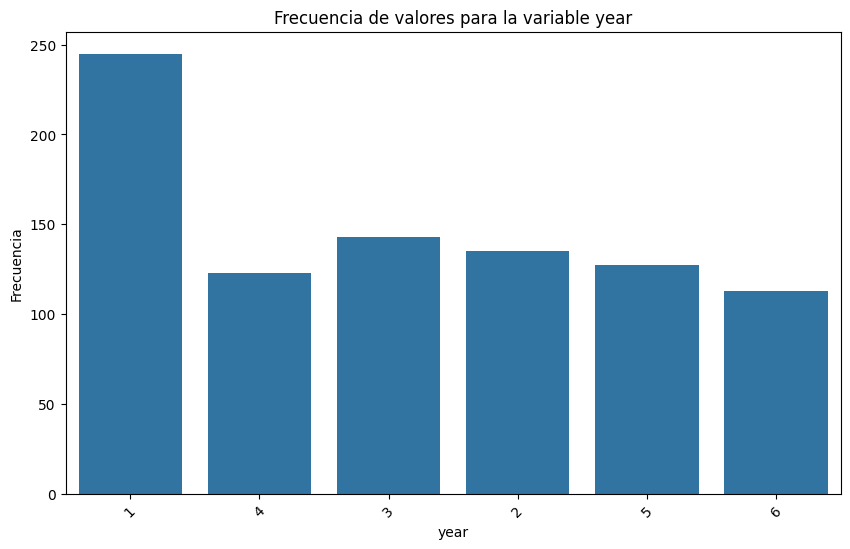

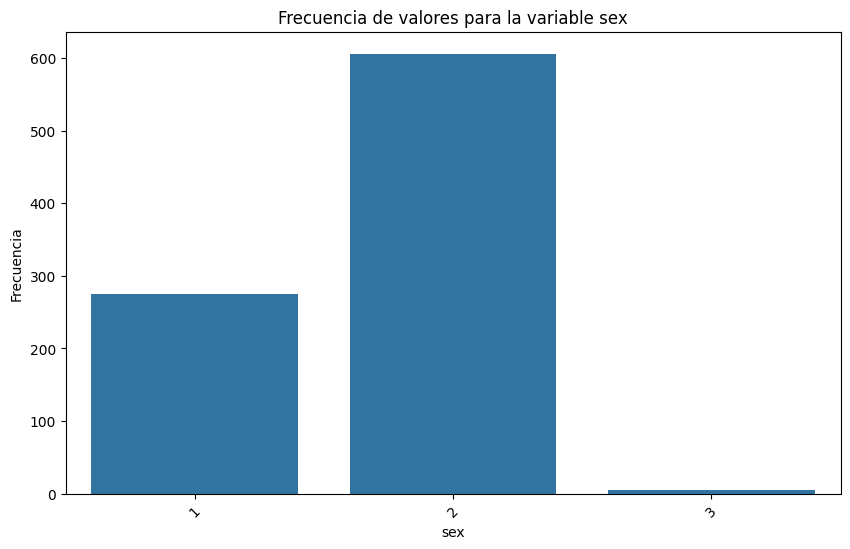

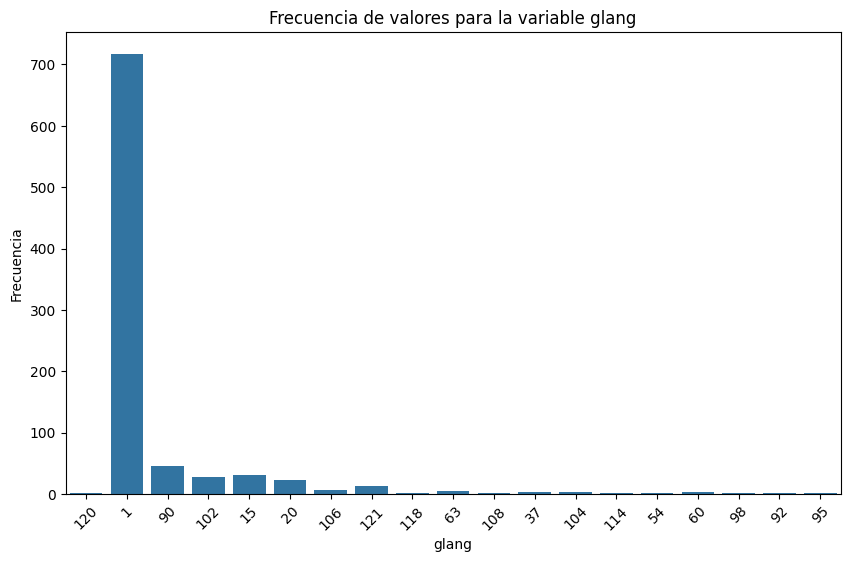

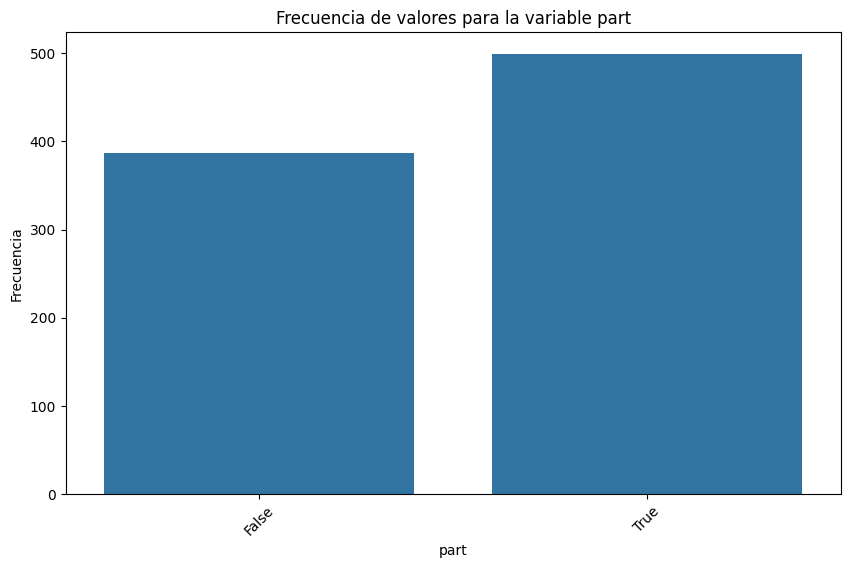

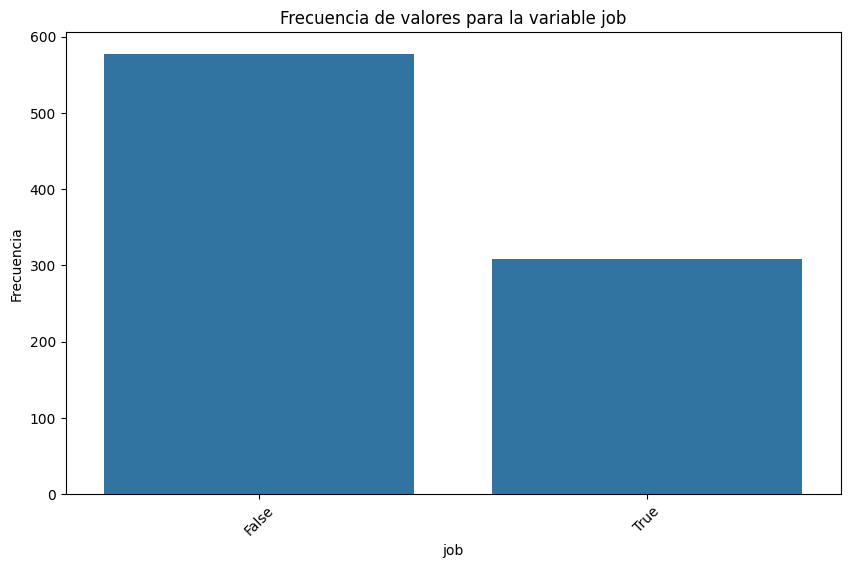

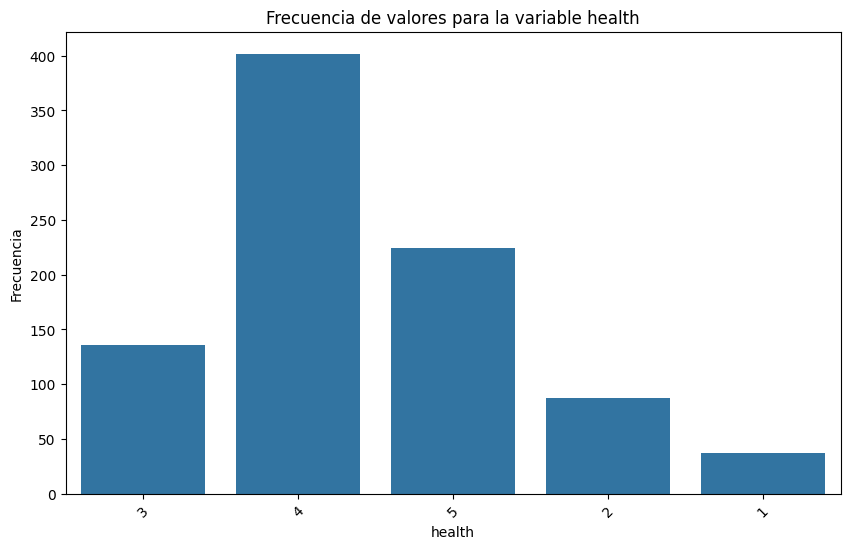

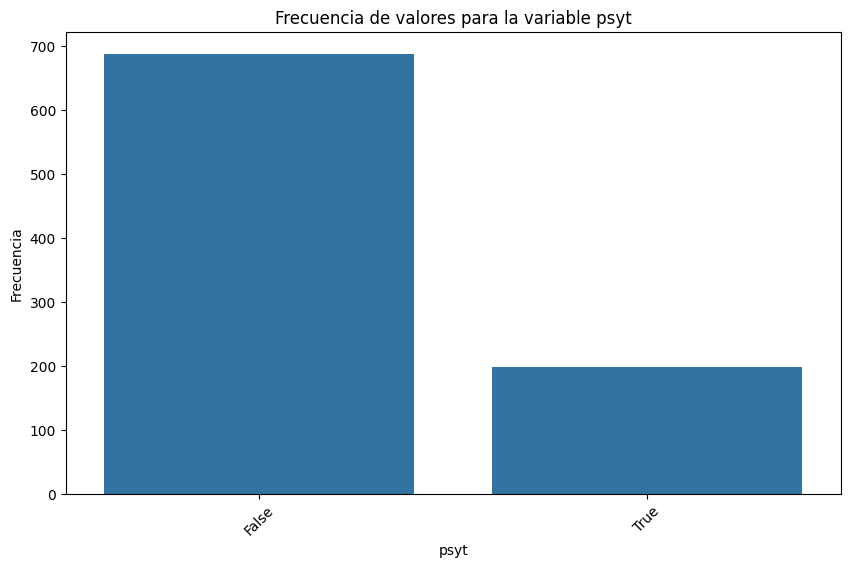

In [9]:
categorical_vars = medTeach.select_dtypes(include=['object', 'bool']).columns

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=medTeach, x=var)
    plt.title(f'Frecuencia de valores para la variable {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


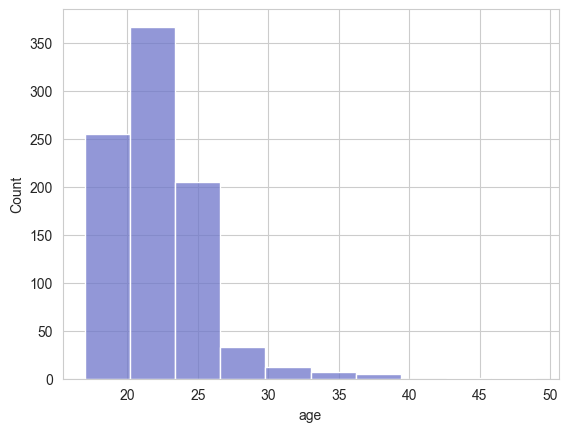

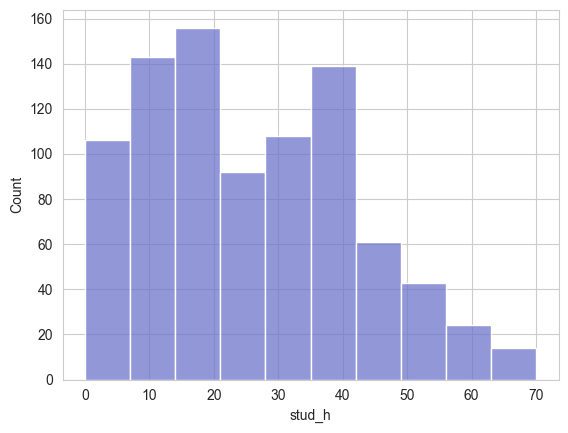

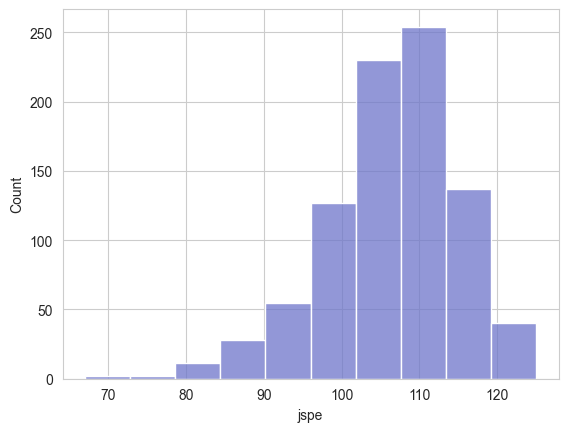

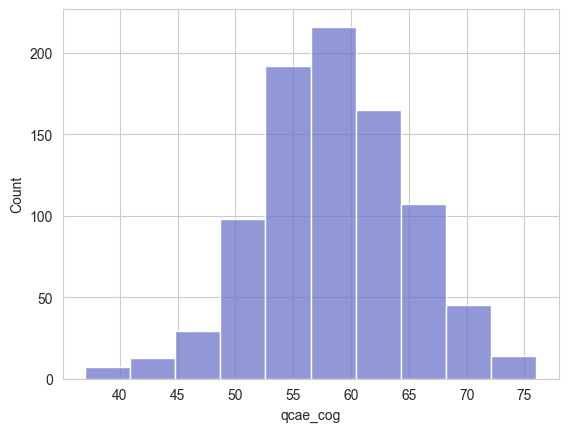

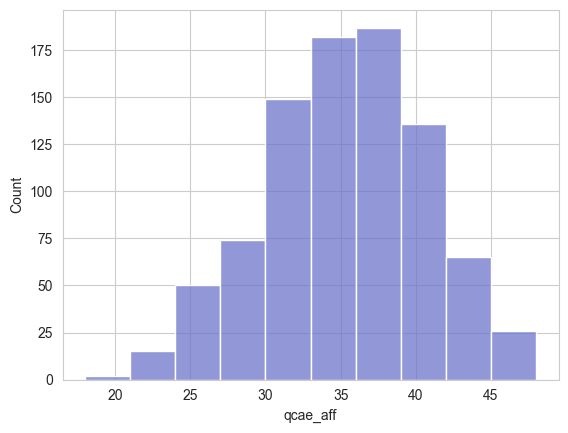

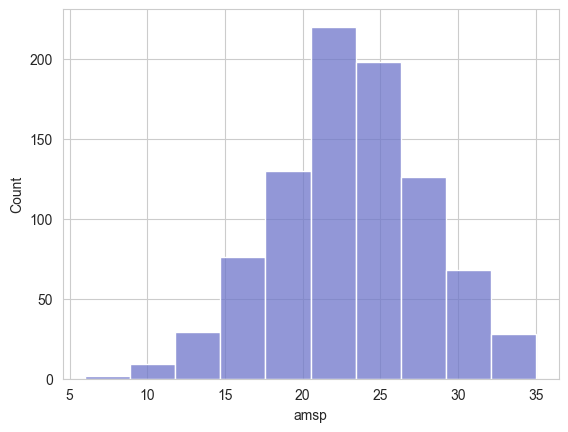

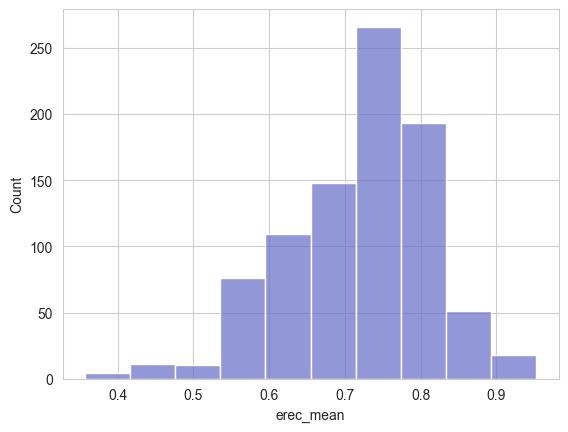

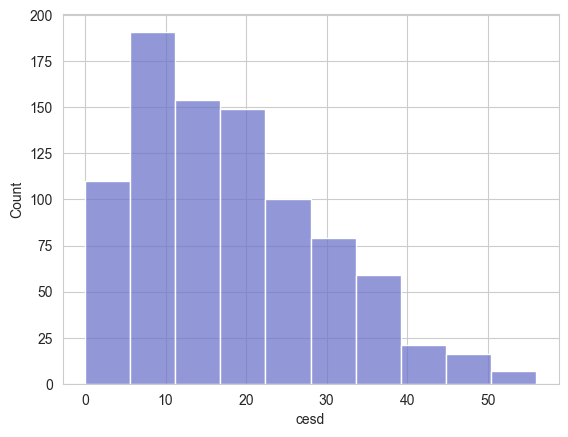

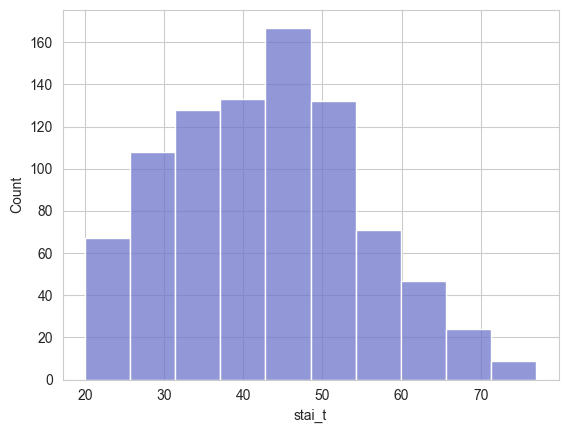

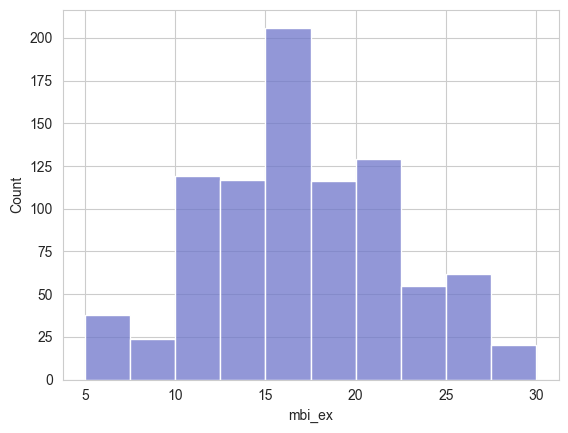

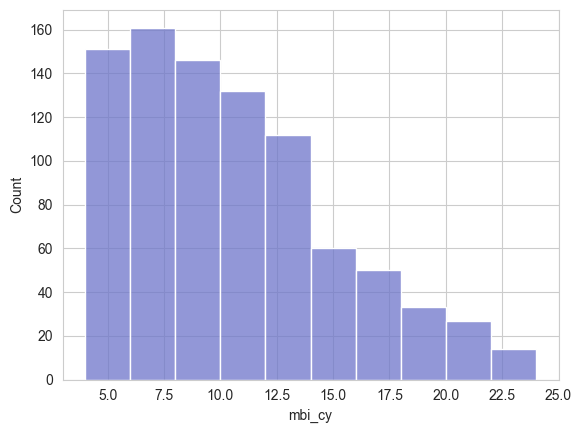

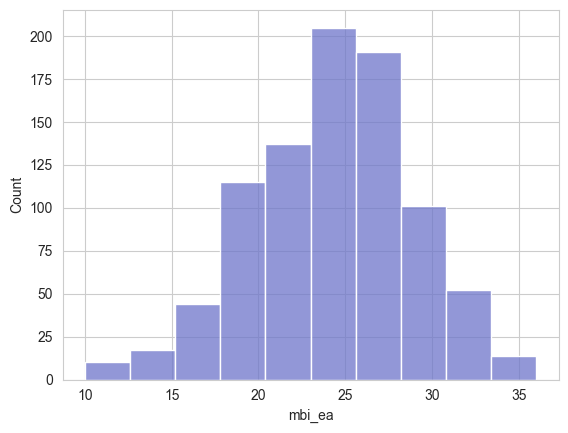

In [10]:
def distribution(value):
    data = medTeach.columns
    column_data = medTeach[data[value]]
    if column_data.dtype in [np.int64, np.float64]:
        sns.set_style('whitegrid')
        sns.histplot(data=column_data, bins=10, kde=False, color='#6E75CA')
        plt.xlabel(data[value])
        plt.show()



dataTypes=medTeach.dtypes
for i in range(dataTypes.size):
    distribution(i)

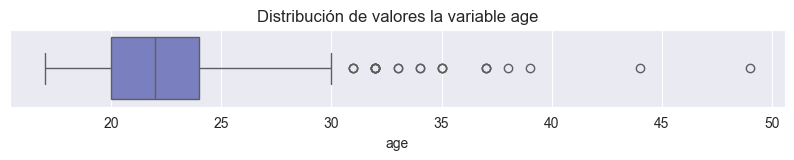

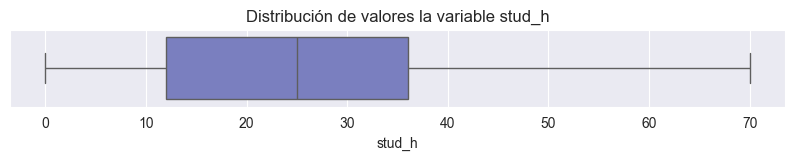

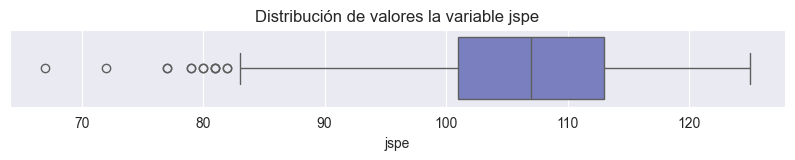

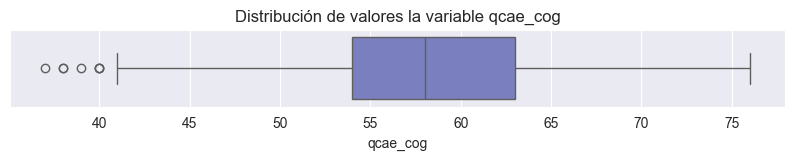

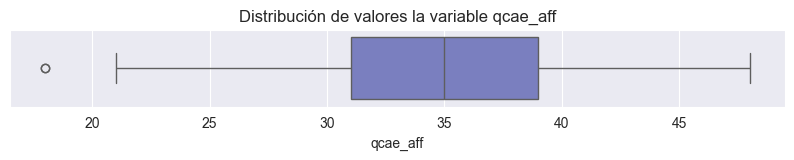

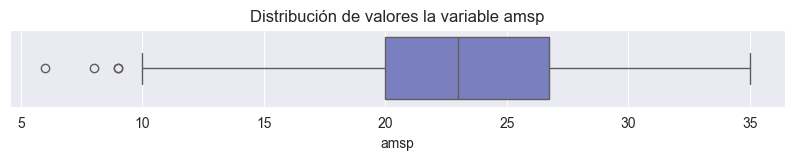

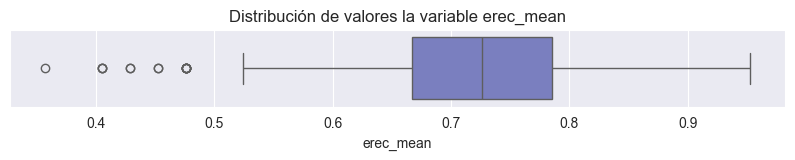

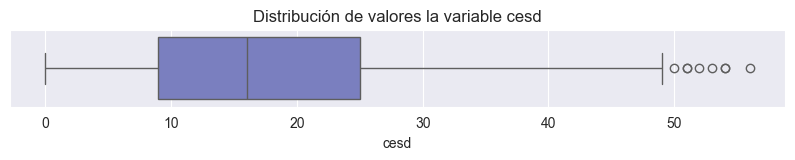

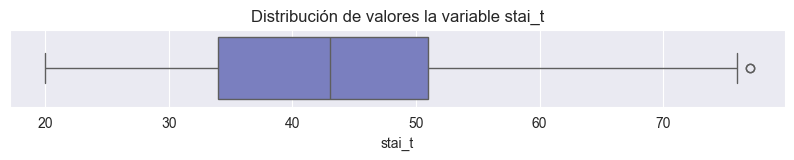

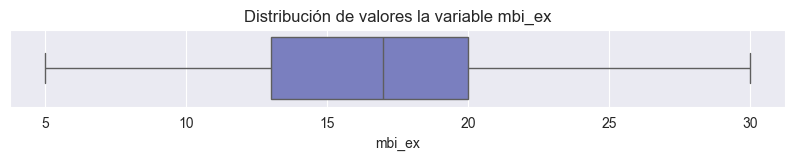

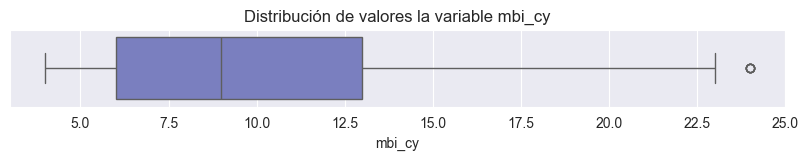

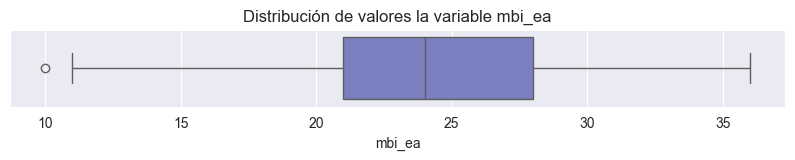

In [11]:
def boxplot(value):
    data = medTeach.columns
    column_data = medTeach[data[value]]
    if column_data.dtype in [np.int64, np.float64]:
        sns.set_style("darkgrid")
        fig, ax = plt.subplots(1, 1, figsize=(10, 1))
        sns.boxplot(x=column_data, color='#6E75CA')
        plt.title('Distribución de valores la variable '+data[value])
        plt.xlabel(data[value])
        plt.show()
        fig.tight_layout()

dataTypes=medTeach.dtypes
for i in range(dataTypes.size):
    boxplot(i)

In [12]:
#correlacion
medTeach_numerics = medTeach.select_dtypes(include=[np.number])
medTeach_numerics.corr()
# age	stud_h	jspe	qcae_cog	qcae_aff	amsp	erec_mean	cesd	stai_t	mbi_ex	mbi_cy	mbi_ea

age    stud_h      jspe  qcae_cog  qcae_aff      amsp  \
age        1.000000 -0.293557  0.223221  0.059355 -0.008130  0.000477   
stud_h    -0.293557  1.000000 -0.134662 -0.023048 -0.032268 -0.001583   
jspe       0.223221 -0.134662  1.000000  0.342668  0.263384  0.099395   
qcae_cog   0.059355 -0.023048  0.342668  1.000000  0.258696  0.386682   
qcae_aff  -0.008130 -0.032268  0.263384  0.258696  1.000000 -0.071391   
amsp       0.000477 -0.001583  0.099395  0.386682 -0.071391  1.000000   
erec_mean -0.018699 -0.056122  0.097062  0.073708  0.141379  0.002780   
cesd      -0.139106  0.174085 -0.080058 -0.034244  0.250947 -0.152052   
stai_t    -0.081893  0.152052 -0.075036 -0.077868  0.331350 -0.249231   
mbi_ex    -0.182733  0.185804 -0.040542 -0.023630  0.215886 -0.073011   
mbi_cy    -0.001853 -0.087386 -0.006981 -0.024820  0.128488 -0.029343   
mbi_ea     0.046130  0.101732  0.082508  0.184096 -0.113891  0.220616   

           erec_mean      cesd    stai_t    mbi_ex    mbi_cy    mbi_ea  
age        -0.018699 -0.139106 -0.081893 -0.182733 -0.001853  0.046130  
stud_h     -0.056122  0.174085  0.152052  0.185804 -0.087386  0.101732  
jspe        0.097062 -0.080058 -0.075036 -0.040542 -0.006981  0.082508  
qcae_cog    0.073708 -0.034244 -0.077868 -0.023630 -0.024820  0.184096  
qcae_aff    0.141379  0.250947  0.331350  0.215886  0.128488 -0.113891  
amsp        0.002780 -0.152052 -0.249231 -0.073011 -0.029343  0.220616  
erec_mean   1.000000  0.029881  0.037688  0.015348  0.061965 -0.034889  
cesd        0.029881  1.000000  0.715728  0.605617  0.407727 -0.453589  
stai_t      0.037688  0.715728  1.000000  0.530486  0.331884 -0.462535  
mbi_ex      0.015348  0.605617  0.530486  1.000000  0.505200 -0.480821  
mbi_cy      0.061965  0.407727  0.331884  0.505200  1.000000 -0.565939  
mbi_ea     -0.034889 -0.453589 -0.462535 -0.480821 -0.565939  1.000000

<Axes: >

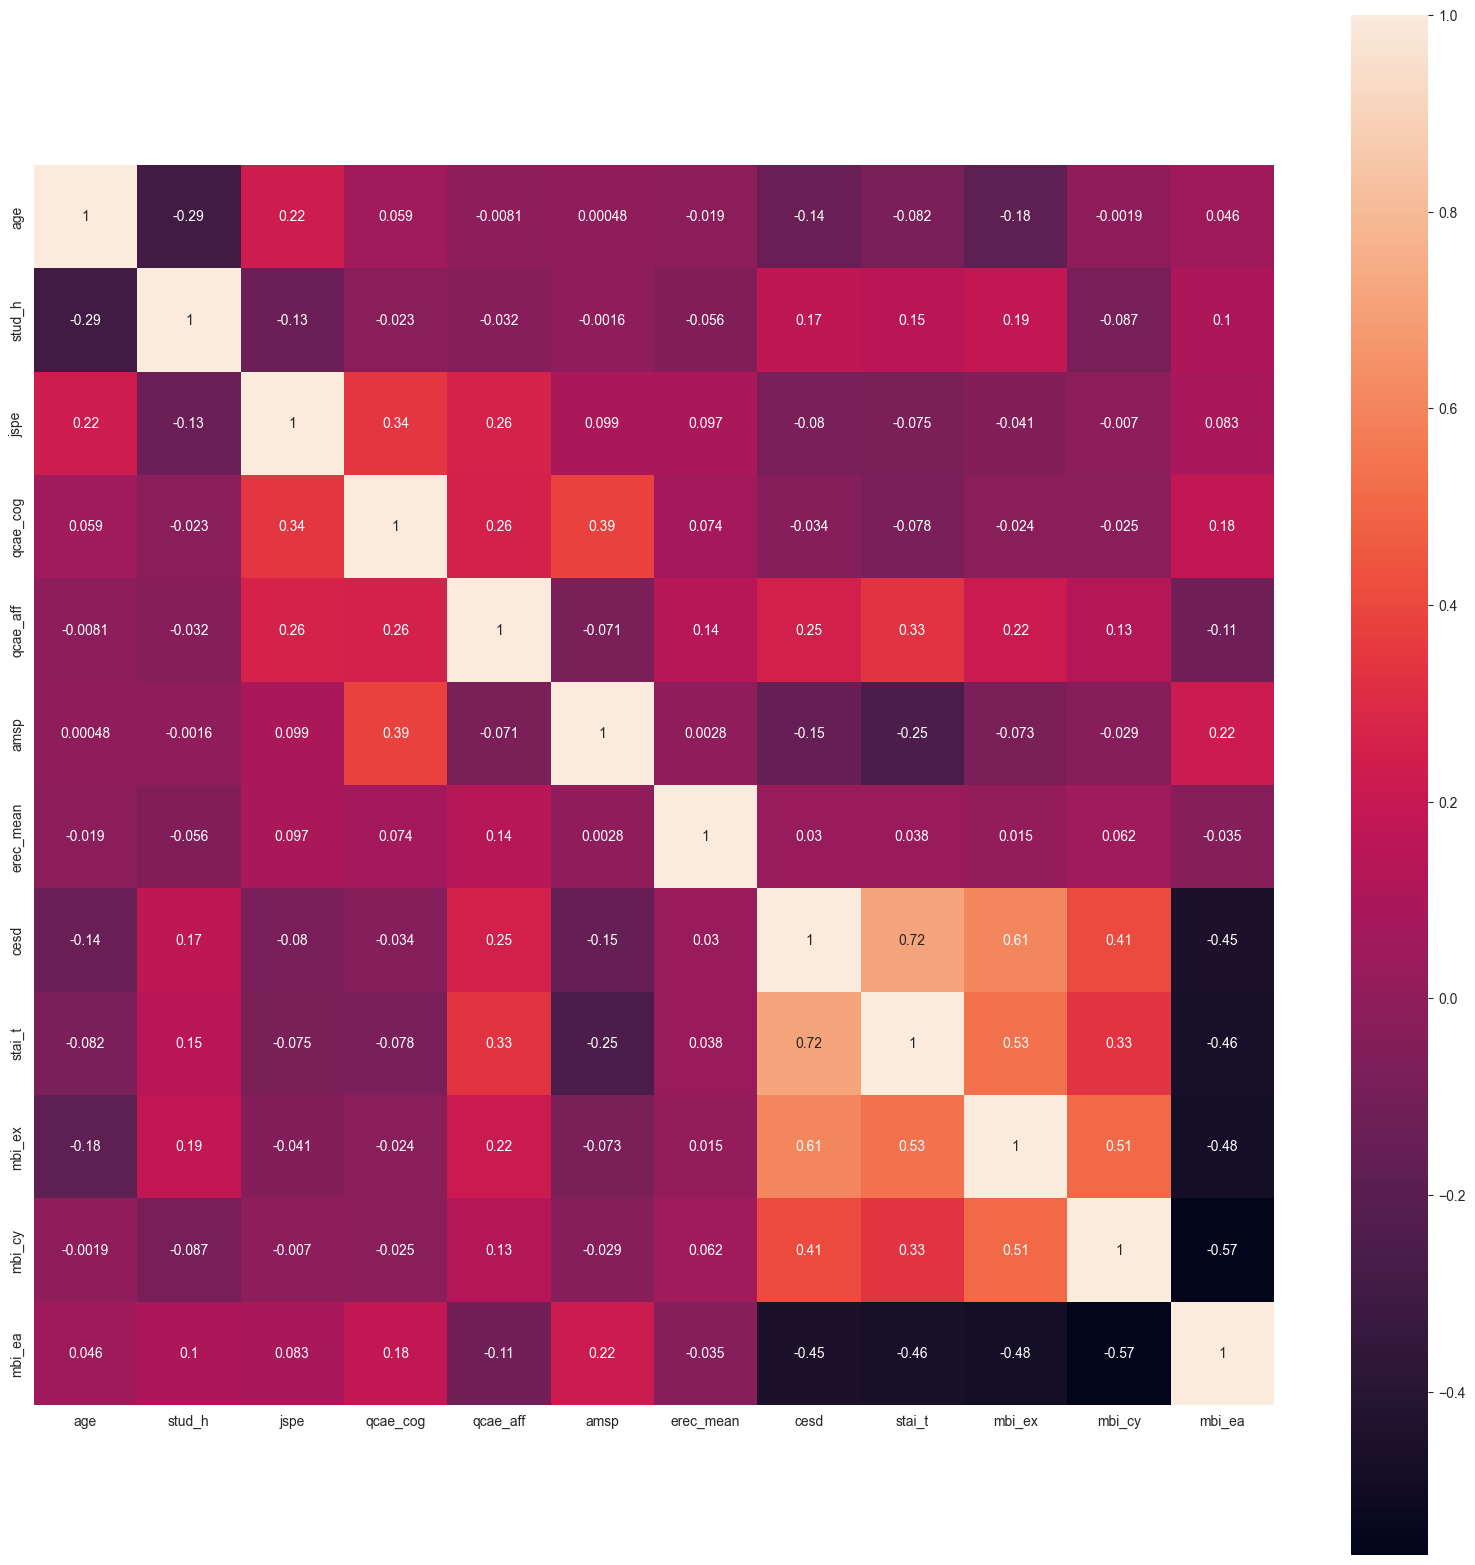

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(medTeach_numerics.corr(), 
            #cmap = 'coolwarm', 
            annot=True,
            square=True)


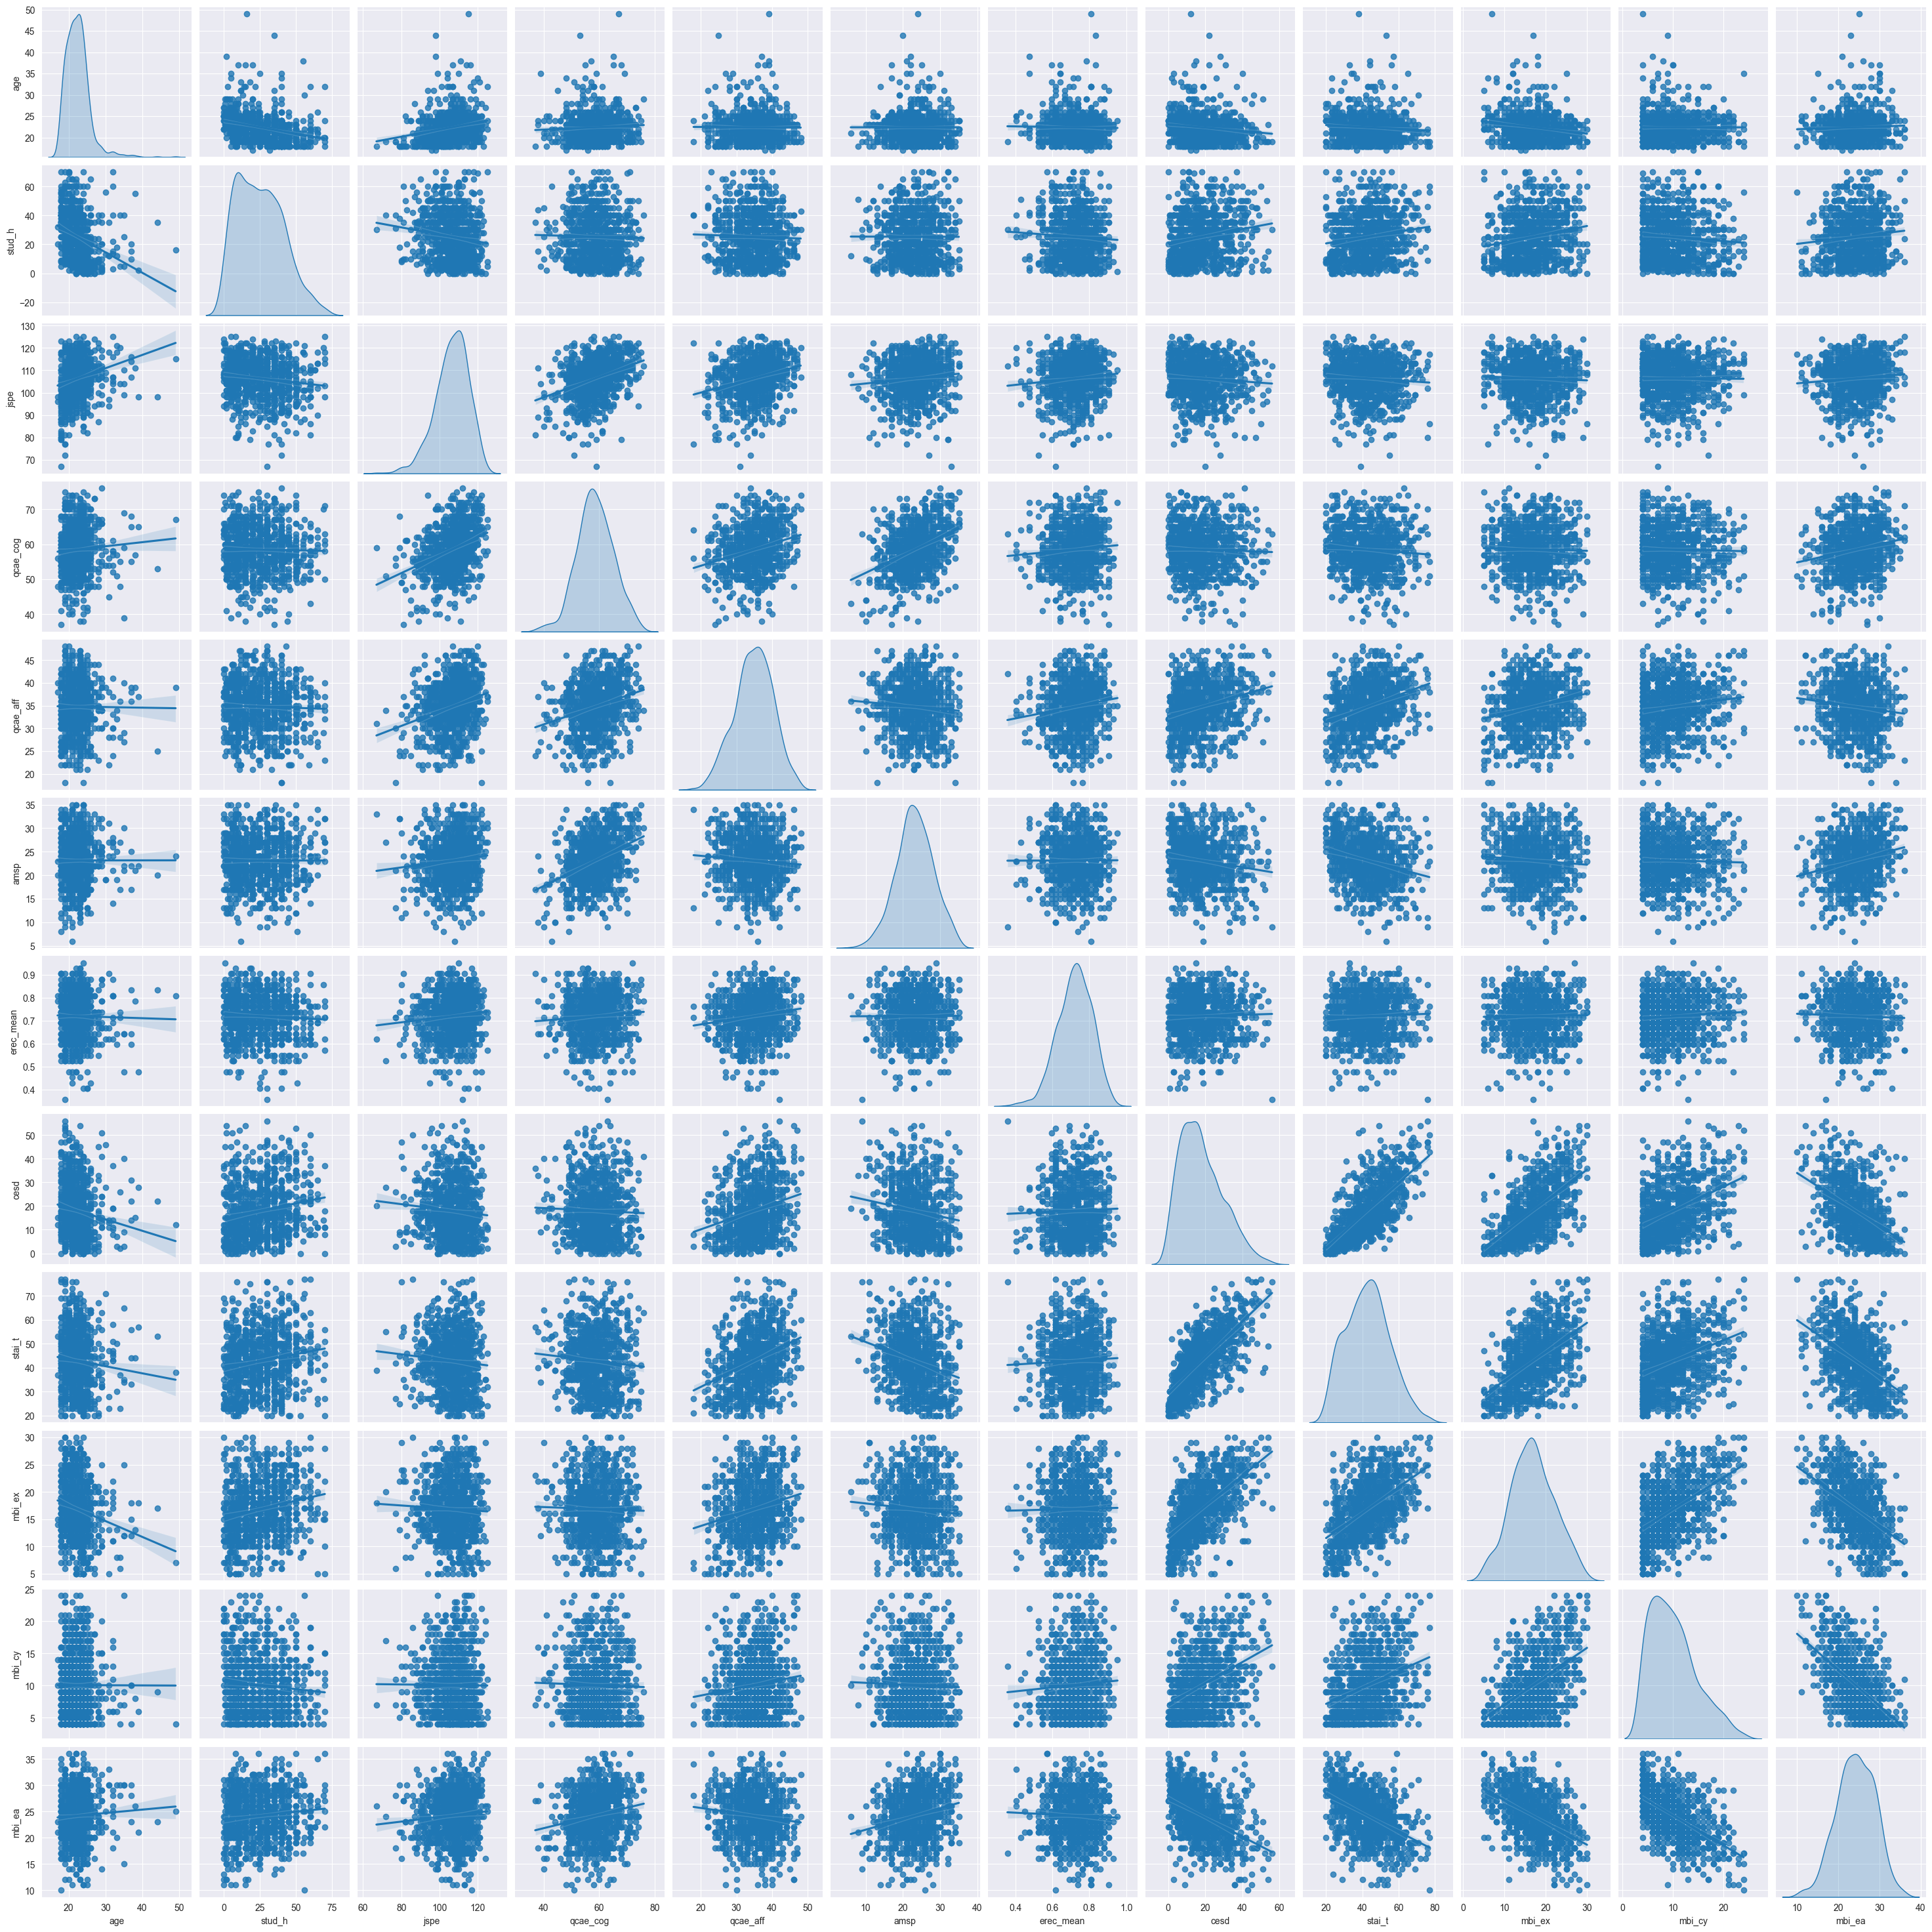

In [14]:
sns.pairplot(medTeach_numerics, kind='reg', diag_kind='kde')